# Introduction to dataset

The data is from the IBM HR Analytics available on Kaggle. Inline with my personal interest in People Analytics, I delved into the dataset to find any  insights. 

Technically, it was a very clean dataset. However, I had to grapple with the issue of unexpected high correlations amongst my per say "independent" variables.

I am open to constructive criticism!



# Data and Package import

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [5]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Exploratory Data Analysis



In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.shape

(1470, 35)

In [11]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

No Missing Values

In [0]:
categor=df.loc[:,['Attrition',	'BusinessTravel','Department','EducationField', 'Gender','JobRole','MaritalStatus','Over18','OverTime']]


In [0]:
def viz (datafr):
  for i in range(datafr.shape[1]):
     print(datafr.iloc[:,i].value_counts(dropna=False),end='\n')
     datafr.iloc[:,i].value_counts().plot(kind='bar')
     plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


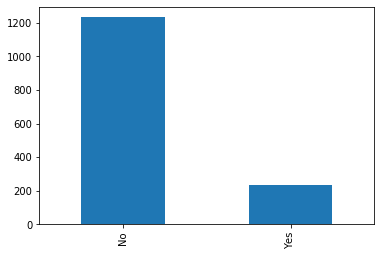

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


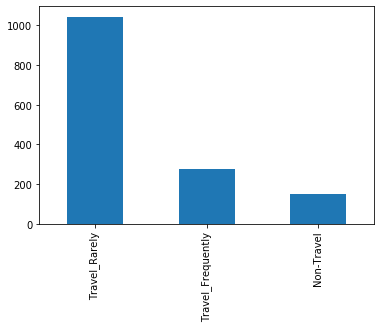

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


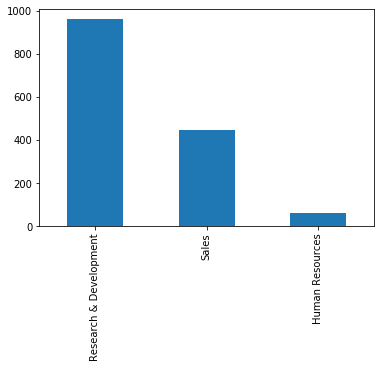

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


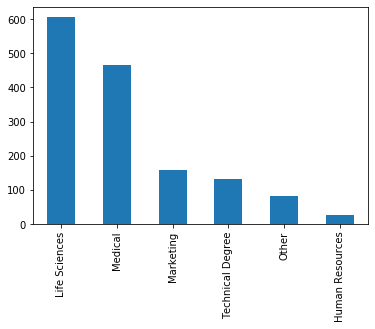

Male      882
Female    588
Name: Gender, dtype: int64


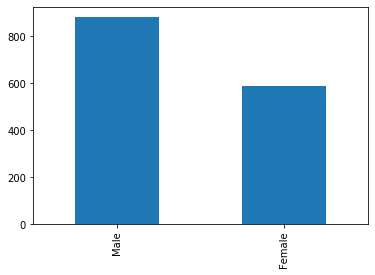

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


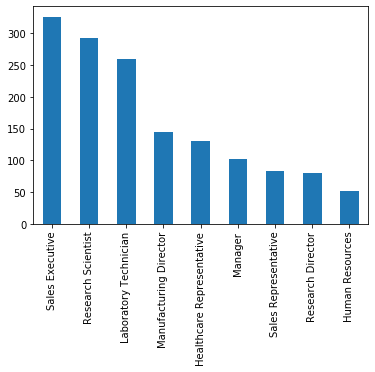

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


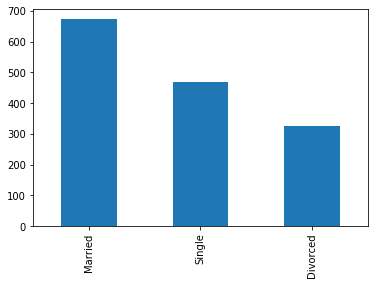

Y    1470
Name: Over18, dtype: int64


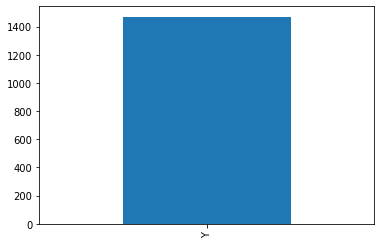

No     1054
Yes     416
Name: OverTime, dtype: int64


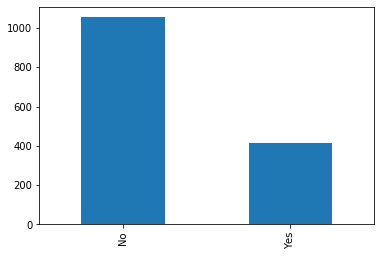

In [14]:
viz(categor)


1.   All employees above 18, can be dropped.
2.   About 20% of data is positive class, need specialized sampling.



In [0]:
df['OverTime'] = np.where(df["OverTime"].str.contains("Yes"), 1,0)

In [0]:
df['Gender'] = np.where(df["Gender"].str.contains("Female"), 1,0)

In [0]:
df['Attrition'] = np.where(df["Attrition"].str.contains("Yes"), 1,0)

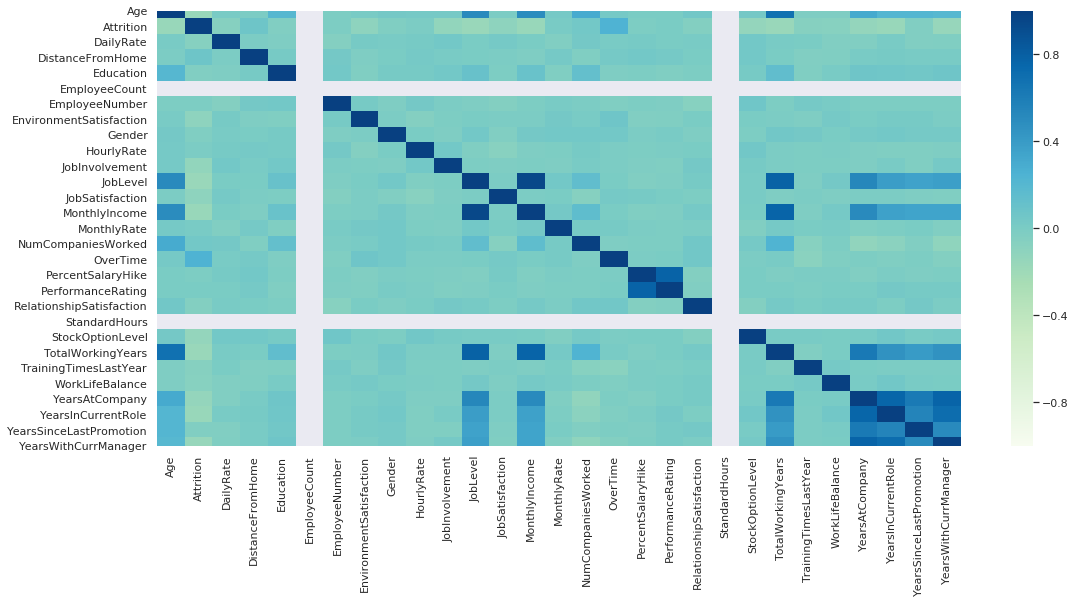

In [18]:
sns.set(rc={'figure.figsize': (18,8)})
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')


*   Employee attrition does not have 'specifically high' corellation with any features.
*   Hypothesis: New employees tend to leave the their jobs more frequently than the older ones, the threshold between the 'new' and 'old' employees seems to be an area of further analysis
*   It must also be noted that fewer the years with the current manager, higher the chances of leaving the job. Thus attrition of managers could lead to chain attrition.
*   The distance from an employee's home also seems to a be a good predictor of attrition
*   Some independent variables are highly correlated with each other.
*   Monthly income and job level have perfect corellation



In [0]:
cat_columns = ["BusinessTravel", "Department","JobRole","MaritalStatus"]
df_processed = pd.get_dummies(df, prefix_sep="__",columns=cat_columns)

In [65]:
df_processed.shape

(1470, 49)

# Balancing data and test train split

In [66]:
# `Split into training and testing sets and using SMOTE for balancing the classes`
X = df_processed.iloc[:, 0:].values
colsToDrop = ['Attrition','Over18','EmployeeCount','EmployeeNumber','JobLevel','DailyRate','HourlyRate','StandardHours',"EducationField"]
X = df_processed.drop(colsToDrop, axis=1)
y = df_processed.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Attrition']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Attrition']==1])/len(os_data_X))

Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [67]:
os_data_X

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel__Non-Travel,BusinessTravel__Travel_Frequently,BusinessTravel__Travel_Rarely,Department__Human Resources,Department__Research & Development,Department__Sales,JobRole__Healthcare Representative,JobRole__Human Resources,JobRole__Laboratory Technician,JobRole__Manager,JobRole__Manufacturing Director,JobRole__Research Director,JobRole__Research Scientist,JobRole__Sales Executive,JobRole__Sales Representative,MaritalStatus__Divorced,MaritalStatus__Married,MaritalStatus__Single
0,44,28,3,4,0,3,1,16328,22074,3,0,13,3,3,1,24,1,4,20,6,14,17,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,40,2,4,2,0,3,2,4327,25440,5,0,12,3,4,3,5,2,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,34,1,2,1,0,3,2,4325,17736,1,0,15,3,3,0,5,2,3,5,2,1,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,40,28,3,3,0,1,1,10932,11373,3,0,15,3,3,1,20,2,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,37,25,2,3,1,2,4,5731,17171,7,0,13,3,3,2,9,2,3,6,2,1,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,35,9,3,2,0,1,1,3407,6930,7,0,21,3,1,0,9,3,3,4,3,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1722,29,17,1,2,0,2,3,2373,14939,1,0,13,3,3,0,3,2,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1723,42,5,2,3,0,2,1,2496,4140,5,1,18,3,3,0,6,2,1,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1724,30,9,1,1,0,3,3,2416,15188,2,1,13,3,1,0,6,2,2,4,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
#standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(os_data_X)
X_test_std = sc.transform(X_test)
X_train_std=pd.DataFrame(X_train_std,columns=columns)
X_test_std=pd.DataFrame(X_test_std,columns=columns)

In [69]:
X_train_std

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel__Non-Travel,BusinessTravel__Travel_Frequently,BusinessTravel__Travel_Rarely,Department__Human Resources,Department__Research & Development,Department__Sales,JobRole__Healthcare Representative,JobRole__Human Resources,JobRole__Laboratory Technician,JobRole__Manager,JobRole__Manufacturing Director,JobRole__Research Director,JobRole__Research Scientist,JobRole__Sales Executive,JobRole__Sales Representative,MaritalStatus__Divorced,MaritalStatus__Married,MaritalStatus__Single
0,0.932747,2.416631,0.262325,1.407810,-0.66569,0.627535,-1.344766,2.389399,1.059715,0.148522,-0.618880,-0.562016,-0.328376,0.440388,0.507062,1.828063,-1.387798,1.904721,2.264085,0.740669,3.903914,3.991806,-0.249307,-0.423990,0.854084,-0.165472,0.995376,-0.561737,-0.238643,-0.150039,-0.397004,-0.211646,-0.245350,5.269409,-0.392101,-0.462367,-0.217555,-0.402852,1.460304,-0.639515
1,0.498250,-0.984615,1.277509,-0.444233,-0.66569,0.627535,-0.418932,-0.329953,1.537947,1.003017,-0.618880,-0.866965,-0.328376,1.402553,3.000477,-0.652674,-0.517715,0.543981,-1.008103,-1.021824,-0.635093,-1.033834,-0.249307,2.358546,-1.170845,-0.165472,-1.004646,1.780192,-0.238643,-0.150039,-0.397004,-0.211646,-0.245350,-0.189775,-0.392101,2.162783,-0.217555,-0.402852,1.460304,-0.639515
2,-0.153496,-1.115432,-0.752860,-1.370254,-0.66569,0.627535,-0.418932,-0.330406,0.443384,-0.705974,-0.618880,0.047880,-0.328376,0.440388,-0.739646,-0.652674,-0.517715,0.543981,-0.190056,-0.434326,-0.310878,-0.146957,-0.249307,-0.423990,0.854084,-0.165472,0.995376,-0.561737,-0.238643,-0.150039,-0.397004,-0.211646,4.075812,-0.189775,-0.392101,-0.462367,-0.217555,-0.402852,1.460304,-0.639515
3,0.498250,2.416631,0.262325,0.481789,-0.66569,-2.142606,-1.344766,1.166699,-0.460654,0.148522,-0.618880,0.047880,-0.328376,0.440388,0.507062,1.305802,-0.517715,0.543981,-0.844494,-1.021824,-0.635093,-0.738208,4.011123,-0.423990,-1.170845,-0.165472,-1.004646,1.780192,-0.238643,-0.150039,-0.397004,-0.211646,-0.245350,-0.189775,-0.392101,2.162783,-0.217555,2.482303,-0.684789,-0.639515
4,0.172377,2.024179,-0.752860,0.481789,1.50220,-0.757536,1.432737,-0.011815,0.363110,1.857513,-0.618880,-0.562016,-0.328376,0.440388,1.753770,-0.130414,-0.517715,0.543981,-0.026447,-0.434326,-0.310878,-0.146957,-0.249307,-0.423990,0.854084,-0.165472,0.995376,-0.561737,4.190363,-0.150039,-0.397004,-0.211646,-0.245350,-0.189775,-0.392101,-0.462367,-0.217555,2.482303,-0.684789,-0.639515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,-0.044872,-0.068895,0.262325,-0.444233,-0.66569,-2.142606,-1.344766,-0.538419,-1.091903,1.857513,-0.618880,1.877570,-0.328376,-1.483941,-0.739646,-0.130414,0.352369,0.543981,-0.353665,-0.140577,-0.635093,-0.146957,-0.249307,-0.423990,0.854084,-0.165472,-1.004646,-0.561737,-0.238643,-0.150039,-0.397004,-0.211646,-0.245350,-0.189775,-0.392101,-0.462367,-0.217555,-0.402852,-0.684789,-0.639515
1722,-0.696618,0.977642,-1.768044,-0.444233,-0.66569,-0.757536,0.506902,-0.772717,0.045994,-0.705974,-0.618880,-0.562016,-0.328376,0.440388,-0.739646,-0.913805,-0.517715,-0.816759,-0.517275,-0.434326,-0.635093,-1.033834,-0.249307,-0.423990,-1.170845,-0.165472,-1.004646,-0.561737,-0.238643,-0.150039,-0.397004,-0.211646,-0.245350,-0.189775,-0.392101,-0.462367,-0.217555,-0.402852,-0.684789,-0.639515
1723,0.715498,-0.592164,-0.752860,0.481789,-0.66569,-0.757536,-1.344766,-0.744846,-1.488299,1.003017,1.615821,0.962725,-0.328376,0.440388,-0.739646,-0.522109,-0.517715,-2.177500,-0.680884,-0.434326,-0.310878,-0.442582,-0.249307,-0.423990,0.854084,-0.1

# PCA

In [0]:
#Covariance matrices
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [71]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[0.1268803934533496, 0.06857619093931308, 0.054223114477023236, 0.05064047072302832, 0.04487299815143147, 0.04056225603238794, 0.038655301731882044, 0.03688843840418055, 0.03422605600137512, 0.0316158482049519, 0.029370205205520947, 0.028109225108407295, 0.027763614024171365, 0.027367356238409968, 0.02688702988017024, 0.026564680227483182, 0.025623673676726296, 0.024309837661518646, 0.023831328279989725, 0.02263602476321393, 0.021973125661274004, 0.02156882602367274, 0.020908923000034538, 0.020266529291275634, 0.019533677928410483, 0.017893338309509704, 0.013646304706542533, 0.012786691465317294, 0.010844864008896104, 0.009724509828773459, 0.007360288140636554, 0.006437661371617634, 0.006105459766711276, 0.005709631723653028, 0.004237695875381058, 0.0033284959964088663, 0.002993310013325281, 0.0024374971675230777, 0.0020109992319632414, 0.0006281273045390546]
[0.12688039 0.19545658 0.2496797  0.30032017 0.34519317 0.38575542
 0.42441073 0.46129916 0.49552522 0.52714107 0.55651127 0.584

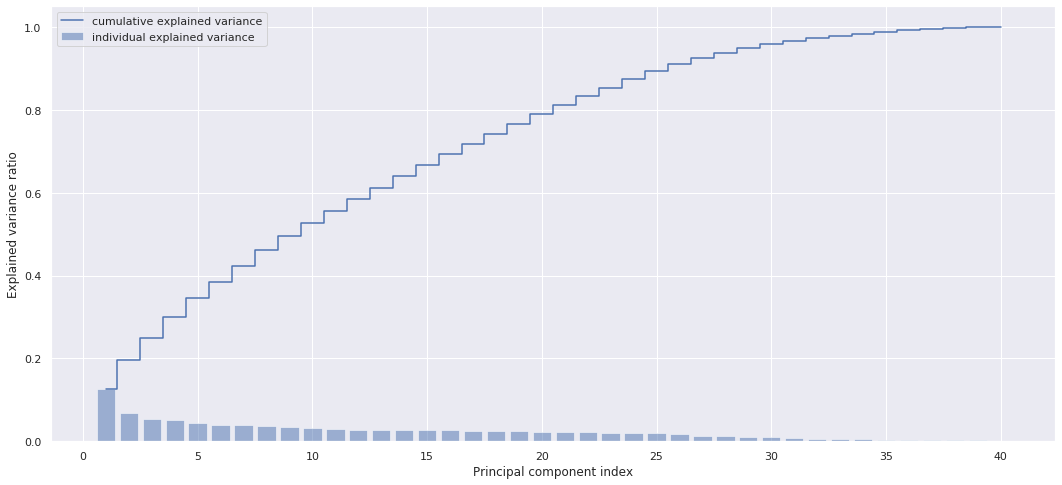

In [72]:
# plot explained variances
plt.bar(range(1,(len(var_exp)+1)), var_exp, alpha=0.5,align='center', label='individual explained variance')
plt.step(range(1,(len(cum_var_exp)+1)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

About 60% of the variance is explained by 15 PCAs. However as the data is not very sparse, we may not not need to use the PCs.

# Fitting a baseline Logistic regression model ignoring highly corellated mutually dependant variables

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train_std, os_data_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = logreg.predict(X_test_std)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_std, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       370
           1       0.76      0.45      0.57        71

    accuracy                           0.89       441
   macro avg       0.83      0.71      0.75       441
weighted avg       0.88      0.89      0.88       441



The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), sample average (only for multilabel classification) and micro average (averaging the total true positives, false negatives and false positives) it is only shown for multi-label or multi-class with a subset of classes because it is accuracy otherwise.

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.


In this example, it is important to identify the percent of positive predictions that were correct. Else, we may end up applying attrition mitigating practices to like a promotions or pay hikes to employees that do not plan to leave the company. Thus we will focus on recall. Though the recall of the 0 class is great (98%), the recall of the positive class is not (41%) despite it being a balanced training data.

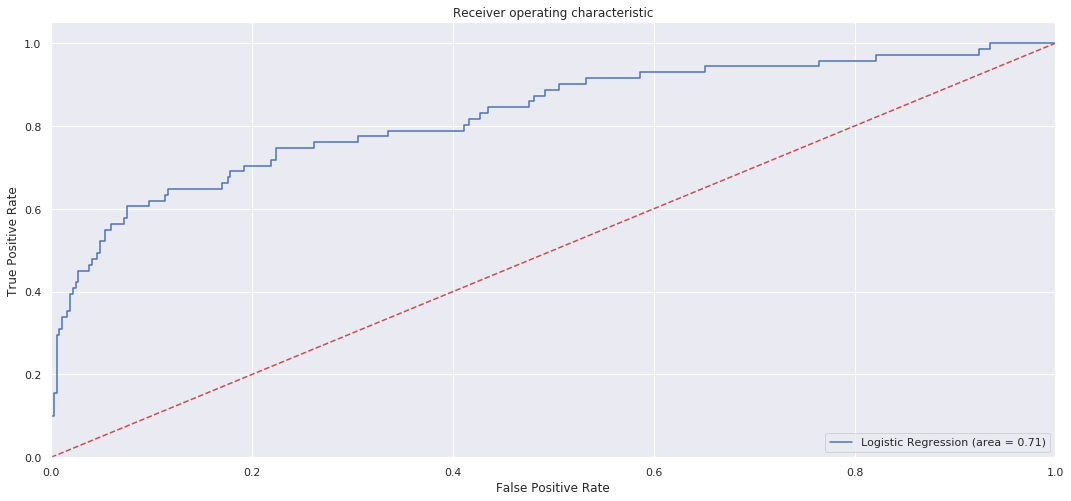

In [76]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve supports our conclusion from the confusion matrix. Thus we must check if the model is overfitting.

# Cross Validation

In [77]:
logreg=LogisticRegression()
predicted = cross_validate(logreg, X_train_std, os_data_y,scoring='recall', cv=5)
print(sorted(predicted.keys()))  
predicted['test_score'].mean()

['fit_time', 'score_time', 'test_score']


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

0.8150221804005915

We see that on using cv, we see a mean recall of 81% which is an improvement from the 69% seen earlier. Though more data is needed to have better prediction abilities

# Contextualizing the model

In [0]:
#After deleting some columns to solve singularity
dummy=pd.concat([X_train_std,os_data_y],axis=1)

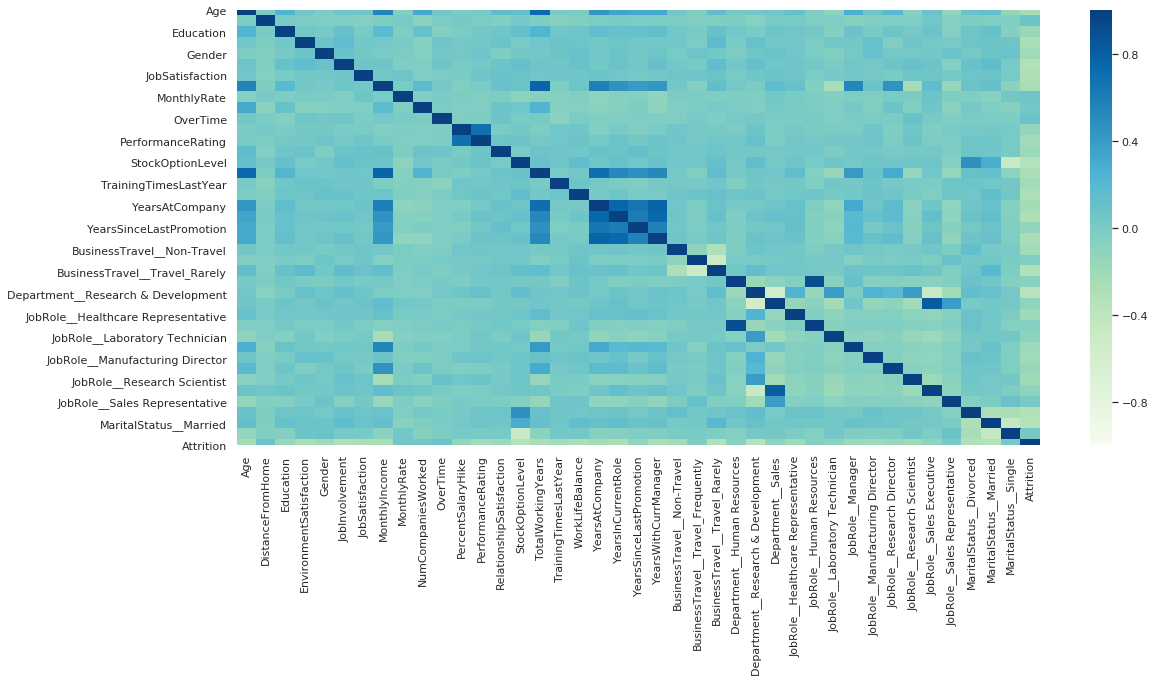

In [81]:
sns.set(rc={'figure.figsize': (18,8)})
sns.heatmap(dummy.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')

In [88]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,X_train_std)
result=logit_model.fit()
resulty=result.summary2()
print(resulty)

         Current function value: 0.180707
         Iterations: 35
                                         Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.739   
Dependent Variable:            Attrition                   AIC:                         703.8014
Date:                          2019-11-04 23:18            BIC:                         921.9438
No. Observations:              1726                        Log-Likelihood:              -311.90 
Df Model:                      39                          LL-Null:                     -1196.4 
Df Residuals:                  1686                        LLR p-value:                 0.0000  
Converged:                     0.0000                      Scale:                       1.0000  
No. Iterations:                35.0000                                                          
------------------------------------------------------------------------------------------------
     

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Insights

Thus we see that the below factors play an important role in predicting attrition:

DistanceFromHome            
EnvironmentSatisfaction   
JobInvolvement       
JobSatisfaction           
OverTime                              
PerformanceRating                    
RelationshipSatisfaction             
TotalWorkingYears    
TrainingTimesLastYear     
WorkLifeBalance        
YearsAtCompany        
YearsInCurrentRole    
YearsSinceLastPromotion     
YearsWithCurrManager    

Though most of these relationships appeal to the common employee behavior, surprisingly promotions, usually used as a employee retention technique shows a positive corellation with attrition. Strikingly, pay related issues do not stand out as strong predictors of attrition. 

These features make a strong case towards investing more in intra-company relationships. The Managers also seem to play an imporatant role in preventing attrition. Department level data cuts and visulazations based on these parameters can provide some valueable insights.

Currently, we can predict attrition with a mean recall of 81%, data with more variance may help better prediction abilities.
